Active contour different implementations and test on hand image 

In [2]:
import sys
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.lines as mlines
from itertools import combinations
from collections import defaultdict
import cv2

# Add the path to the directory containing the 'classes' module
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))

# from classes.edge_detector import EdgeDetector
# from classes.frequency_processor import FrequencyProcessor
# from classes.histogram_processor import HistogramProcessor
# from utils import *

In [3]:
# D:\SBME\3rd Year\CV\Tasks\LucidumLab\Task1-Noisy-Visions-Filtering-and-Edge-Perception\pyQt\data\hand_image_2.jpg
fist_path = '../data/hand_image_2.jpg'
pinky_up_path = '../data/hand_image.jpg'

In [4]:
fist_image = cv2.imread(fist_path, cv2.COLOR_BGR2RGB)
pinky_up_image = cv2.imread(pinky_up_path,  cv2.COLOR_BGR2RGB)

fist_image_gray = cv2.cvtColor(fist_image, cv2.COLOR_RGB2GRAY)
pinky_up_image_gray = cv2.cvtColor(pinky_up_image, cv2.COLOR_RGB2GRAY)



First implementations 

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter

def initialize_snake(center, radius, points=100):
    """Create a circular snake around a given center with a specific radius."""
    s = np.linspace(0, 2 * np.pi, points)
    x = center[0] + radius * np.cos(s)
    y = center[1] + radius * np.sin(s)
    return np.array([x, y]).T

def internal_energy_matrix(n_points, alpha=0.1, beta=0.1, gamma=0.1):
    """Create the internal energy matrix A for smoothness and elasticity."""
    A = np.zeros((n_points, n_points))
    for i in range(n_points):
        A[i, i] = 2 * alpha + 6 * beta
        A[i, (i - 1) % n_points] = -alpha - 4 * beta
        A[i, (i + 1) % n_points] = -alpha - 4 * beta
        A[i, (i - 2) % n_points] = beta
        A[i, (i + 2) % n_points] = beta
    return np.linalg.inv(A + gamma * np.eye(n_points))

def external_energy(image, sigma=1.0):
    """Compute the edge energy from the image gradient."""
    smoothed_image = gaussian_filter(image, sigma)
    gy, gx = np.gradient(smoothed_image)
    edge_energy = np.sqrt(gx**2 + gy**2)
    # Normalize gradients
    gx = gx / np.max(np.abs(gx))
    gy = gy / np.max(np.abs(gy))
    return edge_energy, gx, gy

def optimize_snake(image, snake, inv_matrix, gx, gy, 
                   gamma=0.1, w_edge=1.0, iterations=250, convergence=0.01):
    """Iteratively optimize the snake's position."""
    for iter_num in range(iterations):
        # print(f"Iteration {iter_num + 1}/{iterations}")
        
        # Interpolate external forces at snake points
        int_x = np.clip(snake[:, 0].astype(int), 0, image.shape[1] - 1)
        int_y = np.clip(snake[:, 1].astype(int), 0, image.shape[0] - 1)
        
        fx = gx[int_y, int_x]
        fy = gy[int_y, int_x]
        
        # Normalize external forces
        force_magnitude = np.sqrt(fx**2 + fy**2)
        force_magnitude[force_magnitude == 0] = 1  # Avoid division by zero
        # fx = fx / force_magnitude
        # fy = fy / force_magnitude
        
        # External force vector
        force = np.stack([fx, fy], axis=1) * w_edge
        print("force",force.shape)
        # Update snake using internal and external forces
        new_snake = np.dot(inv_matrix, snake + gamma * force)
        
        # Ensure snake points stay within image boundaries
        new_snake[:, 0] = np.clip(new_snake[:, 0], 0, image.shape[1] - 1)
        new_snake[:, 1] = np.clip(new_snake[:, 1], 0, image.shape[0] - 1)
        
        # Debugging: Check for NaN values
        if np.isnan(new_snake).any():
            print(f"Iteration {iter_num}: NaN values encountered in new_snake: {new_snake}")
            break
        
        # Convergence check
        displacement = np.mean(np.sqrt(np.sum((new_snake - snake) ** 2, axis=1)))
        # print(f"Average displacement: {displacement}")
        if displacement < convergence:
            print("Convergence reached.")
            
            break
        
        snake = new_snake
        
    return snake

def active_contour(image, center, radius, alpha=0.1, beta=0.1, gamma=0, 
                   w_edge=1.0, sigma=1.0, iterations=250, convergence=0.01, points=100):
    """High-level function to initialize and run active contour optimization."""
    snake = initialize_snake(center, radius, points)
    print(snake.shape)
    inv_matrix = internal_energy_matrix(len(snake), alpha, beta, gamma)
    print(inv_matrix.shape)
    edge_energy, gx, gy = external_energy(image, sigma)
    snake = optimize_snake(image, snake, inv_matrix, gx, gy, 
                           gamma, w_edge, iterations, convergence)
    return snake

(100, 2)
(100, 100)
force (100, 2)
force (100, 2)
force (100, 2)
force (100, 2)
force (100, 2)
force (100, 2)
force (100, 2)
force (100, 2)
force (100, 2)
force (100, 2)
force (100, 2)
force (100, 2)
force (100, 2)
force (100, 2)
force (100, 2)
force (100, 2)
force (100, 2)
force (100, 2)
force (100, 2)
force (100, 2)
force (100, 2)
force (100, 2)
force (100, 2)
force (100, 2)
force (100, 2)
force (100, 2)
force (100, 2)
force (100, 2)
force (100, 2)
force (100, 2)
force (100, 2)
force (100, 2)
force (100, 2)
force (100, 2)
force (100, 2)
force (100, 2)
force (100, 2)
force (100, 2)
force (100, 2)
force (100, 2)
force (100, 2)
force (100, 2)
force (100, 2)
force (100, 2)
force (100, 2)
force (100, 2)
force (100, 2)
force (100, 2)
force (100, 2)
force (100, 2)
force (100, 2)
force (100, 2)
force (100, 2)
force (100, 2)
force (100, 2)
force (100, 2)
force (100, 2)
force (100, 2)
force (100, 2)
force (100, 2)
force (100, 2)
force (100, 2)
force (100, 2)
force (100, 2)
force (100, 2)
force

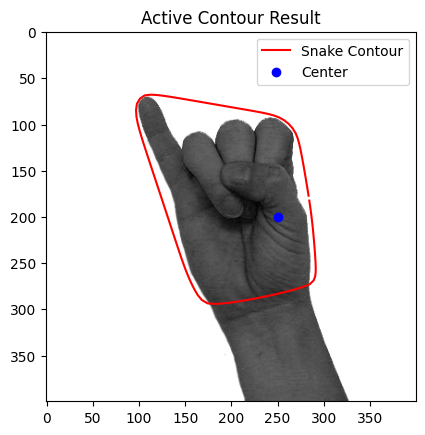

In [ ]:
center = (250, 200)
radius = 200
# for i in range (2, 10):
    # print(f"Number of alpha and beta: {i*1000}")
snake = active_contour(pinky_up_image_gray, center, radius, alpha=.5, beta=.7, gamma=1, 
                    w_edge=7, sigma=1.4, iterations=1000, convergence=0.0001, points=100)

plt.imshow(pinky_up_image_gray, cmap='gray')
plt.plot(snake[:, 0], snake[:, 1], 'r-', label="Snake Contour")
plt.scatter(center[0], center[1], color='blue', label="Center")
plt.title("Active Contour Result")
plt.legend()
plt.show()